## Why NumPy?

- Compact, contiguous arrays of numbers in memory.
- Vectorized operations dispatch to optimized C/BLAS under the hood.
- Expressive APIs for indexing, broadcasting, and linear algebra.
- Foundation for scientific Python (Pandas, SciPy, scikit-learn).

### 1) Review- Creating arrays: 
- Build 1D/2D arrays using `array`, `linspace`, `arange`, and helpers (`zeros`, `ones`, `eye`).

In [1]:
# Add comments to all code in this Notebook
# You have seen this code before
import numpy as np

# 1D arrays
a = np.array([1, 3, 5, 7], dtype=float)
# 2 x 2 array with all integer elements
b = np.array([[1, 2, 3],
              [4, 5, 6]], dtype= int)
x_lin = np.linspace(0.0, 5.0, 11)     # inclusive ends
x_rng = np.arange(0.0, 5.0, 0.5)      # half-open [start, end)

print('a =\n', a)
print('b =\n', b)
print('lin    =', x_lin)
print('arange =', x_rng)

# 2D helpers
Z = np.zeros((2,3))
O = np.ones((3,2))
I = np.eye(3)
print('zeros:\n', Z)
print('ones:\n',  O)
print('eye:\n',   I)


a =
 [1. 3. 5. 7.]
b =
 [[1 2 3]
 [4 5 6]]
lin    = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
arange = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
zeros:
 [[0. 0. 0.]
 [0. 0. 0.]]
ones:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]
eye:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### 2) Vectorization 
- Example: velocity of a falling object

velocity(1.0) = 9.8
t = [0.         0.21052632 0.42105263 0.63157895 0.84210526 1.05263158
 1.26315789 1.47368421 1.68421053 1.89473684 2.10526316 2.31578947
 2.52631579 2.73684211 2.94736842 3.15789474 3.36842105 3.57894737
 3.78947368 4.        ]
v = [ 0.          2.06315789  4.12631579  6.18947368  8.25263158 10.31578947
 12.37894737 14.44210526 16.50526316 18.56842105 20.63157895 22.69473684
 24.75789474 26.82105263 28.88421053 30.94736842 33.01052632 35.07368421
 37.13684211 39.2       ]


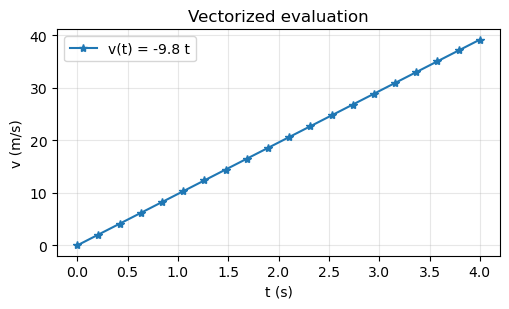

In [13]:
import numpy as np, matplotlib.pyplot as plt

def velocity(t):
    g = 9.8  # m/s^2
    v0 = 0.0
    return g * t + v0

# Scalar works
print('velocity(1.0) =', velocity(1.0))

# Vectorized with NumPy
#t = np.array([0,1,2,3,4], dtype=int) # Vactorize t in an array 
t = np.linspace(0, 4, 20)          # or use linspace
v = velocity(t)
print('t =', t)
print('v =', v)

plt.figure(figsize=(5.2,3.2))
plt.plot(t, v, '*-', label='v(t) = -9.8 t')
# plt.xlim(0, 4)
plt.xlabel('t (s)'); plt.ylabel('v (m/s)'); plt.title('Vectorized evaluation')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()


#### Exercise
Calculate and plot the distance of a falling object with the same initial velocity above. 

distance(1.0) = 95.1
t = [0.         0.1025641  0.20512821 0.30769231 0.41025641 0.51282051
 0.61538462 0.71794872 0.82051282 0.92307692 1.02564103 1.12820513
 1.23076923 1.33333333 1.43589744 1.53846154 1.64102564 1.74358974
 1.84615385 1.94871795 2.05128205 2.15384615 2.25641026 2.35897436
 2.46153846 2.56410256 2.66666667 2.76923077 2.87179487 2.97435897
 3.07692308 3.17948718 3.28205128 3.38461538 3.48717949 3.58974359
 3.69230769 3.79487179 3.8974359  4.        ]
d = [100.          99.94845496  99.79381986  99.53609467  99.17527942
  98.7113741   98.1443787   97.47429323  96.70111769  95.82485207
  94.84549638  93.76305062  92.57751479  91.28888889  89.89717291
  88.40236686  86.80447074  85.10348455  83.29940828  81.39224195
  79.38198554  77.26863905  75.0522025   72.73267587  70.31005917
  67.7843524   65.15555556  62.42366864  59.58869165  56.65062459
  53.60946746  50.46522025  47.21788297  43.86745562  40.4139382
  36.8573307   33.19763314  29.4348455   25.56896778  21.6    

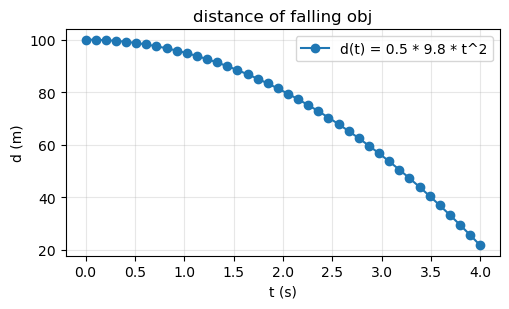

In [23]:
import numpy as np, matplotlib.pyplot as plt
def distance(t):
    g = 9.8  # m/s^2
    d0 = 100.0
    v0 = 0.0
    return (-1/2)*g*t**2 + v0*t + d0
print('distance(1.0) =', distance(1.0))

t = np.linspace(0, 4, 40)
d = distance(t)
print('t =', t)
print('d =', d)
plt.figure(figsize=(5.2,3.2))
plt.plot(t, d, 'o-', label='d(t) = 0.5 * 9.8 * t^2')
plt.xlabel('t (s)'); plt.ylabel('d (m)'); plt.title('distance of falling obj')
plt.grid(True, alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()





### 3) Indexing & slicing (1D and 2D)
- Use basic **indexing & slicing** (including 2D) and perform in-place assignments.

In [34]:
import numpy as np

A = np.array([[7., 8., 9.],
              [4., 5., 6.]])
print('A=', A)
print('Shape =', A.shape)

# Two equivalent ways to index a single element
print('A[1][2] =', A[1][2])
print('A[1,2]  =', A[1,2])

# Row / column slicing
print('Row 0  :', A[0, :])
print('Col 1  :', A[:, 1])

# In-place assignment
A[1, 2] = -2*A[0, 0]
print('After A[1,2] = -2A[0,0]:', A)


A= [[7. 8. 9.]
 [4. 5. 6.]]
Shape = (2, 3)
A[1][2] = 6.0
A[1,2]  = 6.0
Row 0  : [7. 8. 9.]
Col 1  : [8. 5.]
After A[1,2] = -2A[0,0]: [[  7.   8.   9.]
 [  4.   5. -14.]]


In [27]:
import numpy as np

text= "Happy Halloween!"
print(text[10])
print("slice", text[5:8])



o
slice  Ha


#### Exercise
Make a 3 x 5 array using the function of your choice. 
Print out 1). a particular row, 2). a particular colum, and 3). a particular element

In [ ]:
# Your code here


### 4) Broadcasting: eliminating loops
- Apply **broadcasting** rules to eliminate loops and generate grids. It works by automatically expanding the smaller array across the larger one so that they have compatible shapes.

Examples below build a coordinate grid without explicit loops and compute a distance field.

[[-2.        ]
 [-1.55555556]
 [-1.11111111]
 [-0.66666667]
 [-0.22222222]
 [ 0.22222222]
 [ 0.66666667]
 [ 1.11111111]
 [ 1.55555556]
 [ 2.        ]]
[[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
   0.66666667  1.11111111  1.55555556  2.        ]]


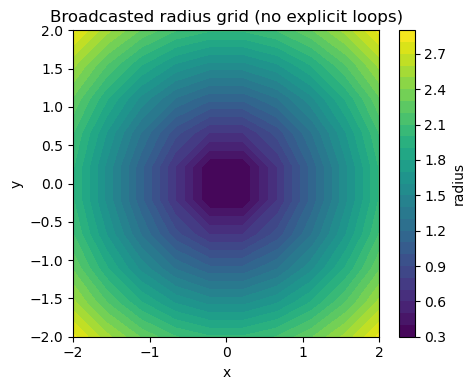

In [39]:
import numpy as np, matplotlib.pyplot as plt

x = np.linspace(-2, 2, 10, dtype=float)[:, None]   # shape (10,1) column
y = np.linspace(-2, 2, 10, dtype= float)[None, :]   # shape (1,10) row
print(x)
print(y)
X = x + 0*y                             # broadcast to (10,10)
Y = 0*x + y                             # broadcast to (10,10)
R = np.sqrt(X**2 + Y**2)                # element-wise
# print(R)
plt.figure(figsize=(5,4))
plt.contourf(X, Y, R, levels=30, cmap='viridis')
plt.colorbar(label='radius')
plt.gca().set_aspect('equal', 'box')
plt.title('Broadcasted radius grid (no explicit loops)')
plt.xlabel('x'); plt.ylabel('y'); plt.tight_layout(); plt.show()


#### Exercise
Make up a function similar to the example above and plot it. 
Try increase the array sizes and see what heppens.

In [ ]:
# Your code here. 


### 5) Dtypes & precision: float32 vs float64
- Choose an appropriate **dtype** and understand precision trade-offs. 

In [42]:
import numpy as np

# A tiny accumulation example
N = 1_000_000_000 # What does this line of code do?
x = np.ones(N, dtype=np.float32) / N
y = np.ones(N, dtype=np.float64) / N
print('sum float32 ≈', x.sum(), ' error=', abs(x.sum()-1.0))
print('sum float64 ≈', y.sum(), ' error=', abs(y.sum()-1.0))
# Run the code and explain what happens.
# Does it take a longer time (compare to other code) to run? Why or why not?

sum float32 ≈ 0.9985961  error= 0.0014039278
sum float64 ≈ 1.000000000001517  error= 1.5170087408478139e-12


#### Exercise
Make two arrays using np.array. They have exactly the same elements but different precisions- one of them is float32 and the other one is float 64. Print out the difference of the (third items/1,000,000) in these two arrays. Should it be ZERO?? Why or whynot?

In [ ]:
# Your code here


### 6) Reshape & aggregations (axis)

In [44]:
import numpy as np

A = np.arange(12)
B = A.reshape(3,4) # What does this line of code do? Can you fix the error?
print('B=', B)
print('sum over rows (axis=1):', B.sum(axis=1)) # What does this line of code do?
print('mean over cols (axis=0):', B.mean(axis=0)) # What does this line of code does?


B= [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
sum over rows (axis=1): [ 6 22 38]
mean over cols (axis=0): [4. 5. 6. 7.]


#### Exercise
Make another array and reshape it. Sum over each row and each colum of this array.

In [ ]:
# Your code here

### 7) Quick exercises to connect all the things we have learned so far

#### Exercise
Use NumPy array and matplotlib to plot y= x^3 - 2x. 

[-135.          -98.48301502  -69.40151626  -46.88074063  -30.04592506
  -18.02230646   -9.93512174   -4.90960781   -2.0710016    -0.54454002
    0.54454002    2.0710016     4.90960781    9.93512174   18.02230646
   30.04592506   46.88074063   69.40151626   98.48301502  135.        ]


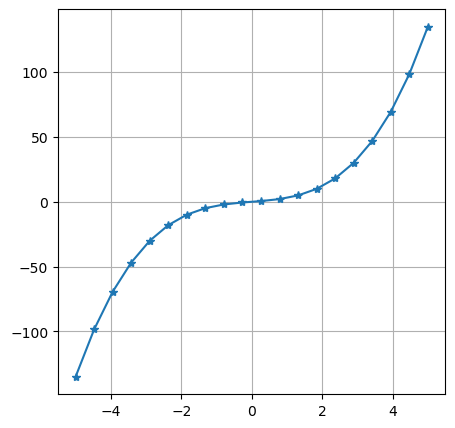

In [61]:

import numpy as np, matplotlib.pyplot as plt
def plot(x):
    return x**3 + 2*x


X = np.linspace(-5, 5, 20, dtype=float)
Y = plot(x)

print(Y)
plt.figure(figsize=(5,5))
plt.plot(X, Y, '*-', label='y = x^3 + 2x')
plt.grid(True, alpha=1); 

#### Exercise
The dimensions of your arrays are undeclared initially. Use loops or recrusions to plot the function y= x^3 - 2x. You should get the same plot as above.
Hint: Start with a flowchart. You may use append. 

[-10]
[-980]
[-10, -9.9]
[-980, -950.4990000000001]
[-10, -9.9, -9.8]
[-980, -950.4990000000001, -921.5920000000002]
[-10, -9.9, -9.8, -9.700000000000001]
[-980, -950.4990000000001, -921.5920000000002, -893.2730000000004]
[-10, -9.9, -9.8, -9.700000000000001, -9.600000000000001]
[-980, -950.4990000000001, -921.5920000000002, -893.2730000000004, -865.5360000000004]
[-10, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.500000000000002]
[-980, -950.4990000000001, -921.5920000000002, -893.2730000000004, -865.5360000000004, -838.3750000000005]
[-10, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.500000000000002, -9.400000000000002]
[-980, -950.4990000000001, -921.5920000000002, -893.2730000000004, -865.5360000000004, -838.3750000000005, -811.7840000000006]
[-10, -9.9, -9.8, -9.700000000000001, -9.600000000000001, -9.500000000000002, -9.400000000000002, -9.300000000000002]
[-980, -950.4990000000001, -921.5920000000002, -893.2730000000004, -865.5360000000004, -838.3750000000005

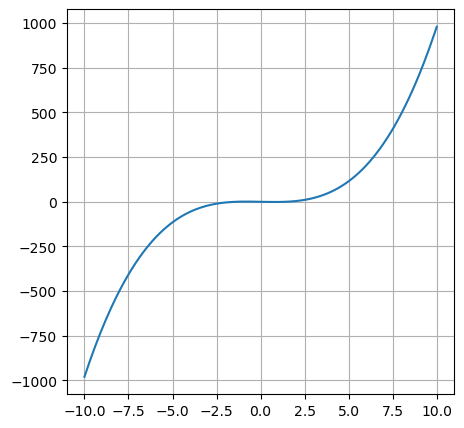

In [78]:
import numpy as np, matplotlib.pyplot as plt


# initialize empty arrays
x_vals = []
y_vals = []

# define range of x values
start = -10
end = 10
step = 0.1
x = start



while x <= 10:
    y = x**3 - 2*x
    x_vals.append(x)
    y_vals.append(y)
    x += step
    print(x_vals)
    print(y_vals)


plt.figure(figsize=(5,5))
plt.plot(x_vals, y_vals, label='y = x^3 + 2x')
plt.grid(True, alpha=1); 
    
